 # Homework 3
 ## ATSC 507
 ### Christopher Rodel

In [1]:
import context
import numpy as np
import pandas as pd
from context import data_dir
import matplotlib.pyplot as plt
import matplotlib.colors as colors 
from labellines import labelLine, labelLines
from cr507.utils import plt_set

## Set path to data
filein = str(data_dir) + '/n_hem.csv'

## Read data
df = pd.read_csv(filein)

## Make 1D arrays of lat and lon
lat = np.array(df['lat_degr'])
lon = np.array(df['lon_degr'])





******************************
context imported. Front of path:
/Users/crodell/atsc507
/private/var/folders/9s/0p5yd78j0yd94hjttzwb6gq00000gp/T/93002e49-66d0-4609-9978-5de0fe595f6e
******************************

through /Users/crodell/atsc507/py/hw3/context.py -- pha
through /Users/crodell/atsc507/cr507/__init__.py pha II


 - 1\) Then everyone use these files to create two maps, similar to the maps
 in the solved example on page 748 Stull 2017 Practical Meteorology.
 Namely, one map is a plot of the coastlines on a lat/lon grid, and the
 other is a plot of the coastlines on a polar stereographic grid using
 60°N as the reference latitude.
 $$
 \\
 $$
 *We will make use of the following equation to apply the cordinate transform.*
 $$
 \\
 $$
 $$
 x=r \cdot \cos (\lambda) \quad, \quad y=r \cdot \sin (\lambda)
 $$
 $$
 \\
 $$
 $$
 r=L \cdot \tan \left[0.5 \cdot\left(90^{\circ}-\phi\right)\right], L=R_{o} \cdot\left[1+\sin \left(\phi_{\mathrm{o}}\right)\right]
 $$

Text(0, 0.5, 'Lat')

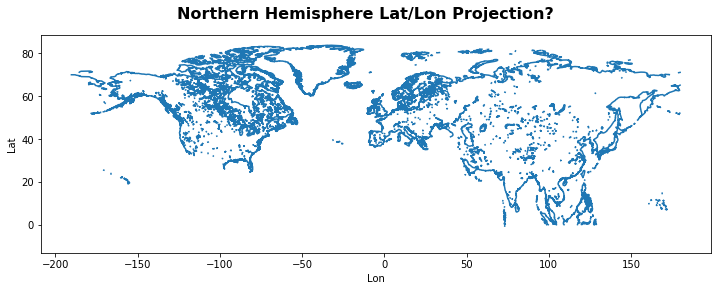

In [2]:
""" ####################################################################### """
""" ############################# Make Plots ############################## """

## Set up Figure for plotting multiple variable on one graph
fig, ax = plt.subplots(1,1, figsize=(12,4))
fig.suptitle('Northern Hemisphere Lat/Lon Projection?', fontsize= plt_set.title_size, fontweight="bold")
ax.plot(lon, lat)
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')




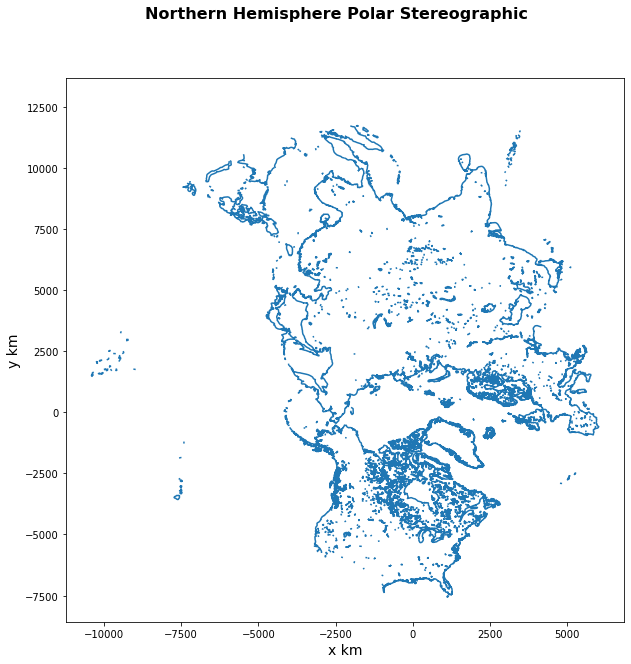

In [3]:

## define constants
Ro = 6371   # Units: km
phio = 60   # Units: deg

## convert deg to rad
DtoR = (np.pi/180)

## APply cordinate stransform to Polar Stereographic
L = Ro * (1 + np.sin(phio * DtoR)) 
r = L * np.tan(0.5*((90 - lat) * DtoR)) 

x = r * np.cos(lon * DtoR)
y = r * np.sin(lon * DtoR)

## Make plot of Polar Stereographic projection
fig, ax = plt.subplots(1,1, figsize=(10,10))
fig.suptitle('Northern Hemisphere Polar Stereographic', fontsize= plt_set.title_size, fontweight="bold")
ax.plot(x, y)
ax.set_xlabel('x km', fontsize = plt_set.label)
ax.set_ylabel('y km', fontsize = plt_set.label)
plt.show()



 - 2\) On page 748 Stull 2017 Practical Meteorology,
 in the INFO box, is eq. (F20.2), which gives an
 expression for "r".  This looks different than the
 expression I gave in class.  Start with the eq for "r"
 that Stull wrote on the blackboard during class, and
 show how you can manipulate that equation to get eq (F20.2).
 $$
 \text{Knowing}
 $$
 $$
 \cos \phi=\sin \left(90-\phi\right) \hspace{10mm} (1)
 $$
 $$
 \sin \phi=\cos \left(90-\phi\right) \hspace{10mm} (2)
 $$
 $$
 \tan \frac{\phi}{2}=\frac{\sin \phi}{1+\cos \phi} \hspace{10mm} (3)
 $$
 $$
 \\
 $$
 $$
 \\
 $$
 $$
 \\
 $$
 $$
 \frac{r}{L}=\frac{R \cos \phi}{R+R \sin \phi}
 $$
 $$
 r=L\frac{R \cos \phi}{R+R \sin \phi}
 $$
 $$
 r=LR\frac{\cos \phi}{1+ \sin \phi}
 $$
 $$
 \text{Apply 1 & 2}
 $$
 $$
 r=LR\frac{\sin \left(90-\phi\right)}{1+ \cos \left(90-\phi\right)}
 $$
 $$
 \text{Apply 3}
 $$
 $$
 r=LR\tan \frac{90-\phi}{2}
 $$
 $$
 r=LR\tan[0.5 ({90-\phi})]
 $$


 3) For the second advection term shown in class (term II),
 simplify it using equations such as M27 or other equations.
 Show your work, and discuss the interpretation of your results.
 $$
 \\
 $$
 $$
 \begin{aligned}
 \frac{d u_{m}}{d t} &=\left(\cos \alpha_{r}\right)\left\{\frac{\partial u_{s}}{\partial t}+\frac{\partial u_{s} u_{s}}{\partial x}+\frac{\partial v_{s} u_{s}}{\partial y}+\frac{\partial \eta_{s} u_{s}}{\partial \eta}\right\} \\
 &+\left(\sin \alpha_{r}\right)\left\{\frac{\partial v_{s}}{\partial t}+\frac{\partial u_{s} v_{s}}{\partial x}+\frac{\partial v_{s} v_{s}}{\partial y}+\frac{\partial \eta_{s} v_{s}}{\partial \eta}\right\}
 \end{aligned}
 $$
 $$
 \\
 $$
 $$
 \left(\begin{array}{l}
 {u_{m}} \\
 {v_{m}}
 \end{array}\right)=\left(\begin{array}{cc}
 {\cos \alpha_{r}} & {-\sin \alpha_{r}} \\
 {\sin \alpha_{r}} & {\cos \alpha_{r}}
 \end{array}\right)\left(\begin{array}{l}
 {u_{s}} \\
 {v_{s}}
 \end{array}\right) \hspace{10mm} \text{(M27)}
 $$
 $$
 \\
 $$
 $$
 \begin{aligned}
 \frac{d u_{m}}{d t} &=\underbrace{\frac{\partial}{\partial t}[(\cos \alpha_{r}) u_{s}
 +(-\sin \alpha_{r}) v_{s}]}_\text{I} \\
 &+\underbrace{\frac{\partial}{\partial x}[(\cos \alpha_{r}) u_{s}u_{s}+(-\sin \alpha_{r}) u_{s}v_{s}]}_\text{II} \\
 &+ \underbrace{\frac{\partial}{\partial y}[(\cos \alpha_{r}) v_{s}u_{s}+(-\sin \alpha_{r}) v_{s}v_{s}]}_\text{III} \\
 &+ \underbrace{\frac{\partial}{\partial y}[(\cos \alpha_{r}) \eta_{s}u_{s}+(-\sin \alpha_{r}) \eta_{s}v_{s}]}_\text{IV} \\
 &
 \end{aligned}
 $$
 $$
 \hspace{10mm}  \text{Apply M27}
 $$
 $$
 I = \frac{d u_{m}}{d t}
 $$
 $$
 \hspace{20mm}  \text{t is independent of maping, no extra "m(s)"}
 $$
 $$
 \\
 $$
 $$
 \\
 $$
 $$
 II = \frac{\partial}{\partial x}[(\cos \alpha_{r}) u_{s}u_{s}+(-\sin \alpha_{r}) u_{s}v_{s}]
 $$
 $$
 II = \frac{\partial}{\partial x}u_{s}[(\cos \alpha_{r}) u_{s}+(-\sin \alpha_{r}) v_{s}]
 $$
 $$
 II = \frac{\partial u_{m}u_{s}}{\partial x}
 $$